# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [204]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

Прочитаем исходные данные:

In [205]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

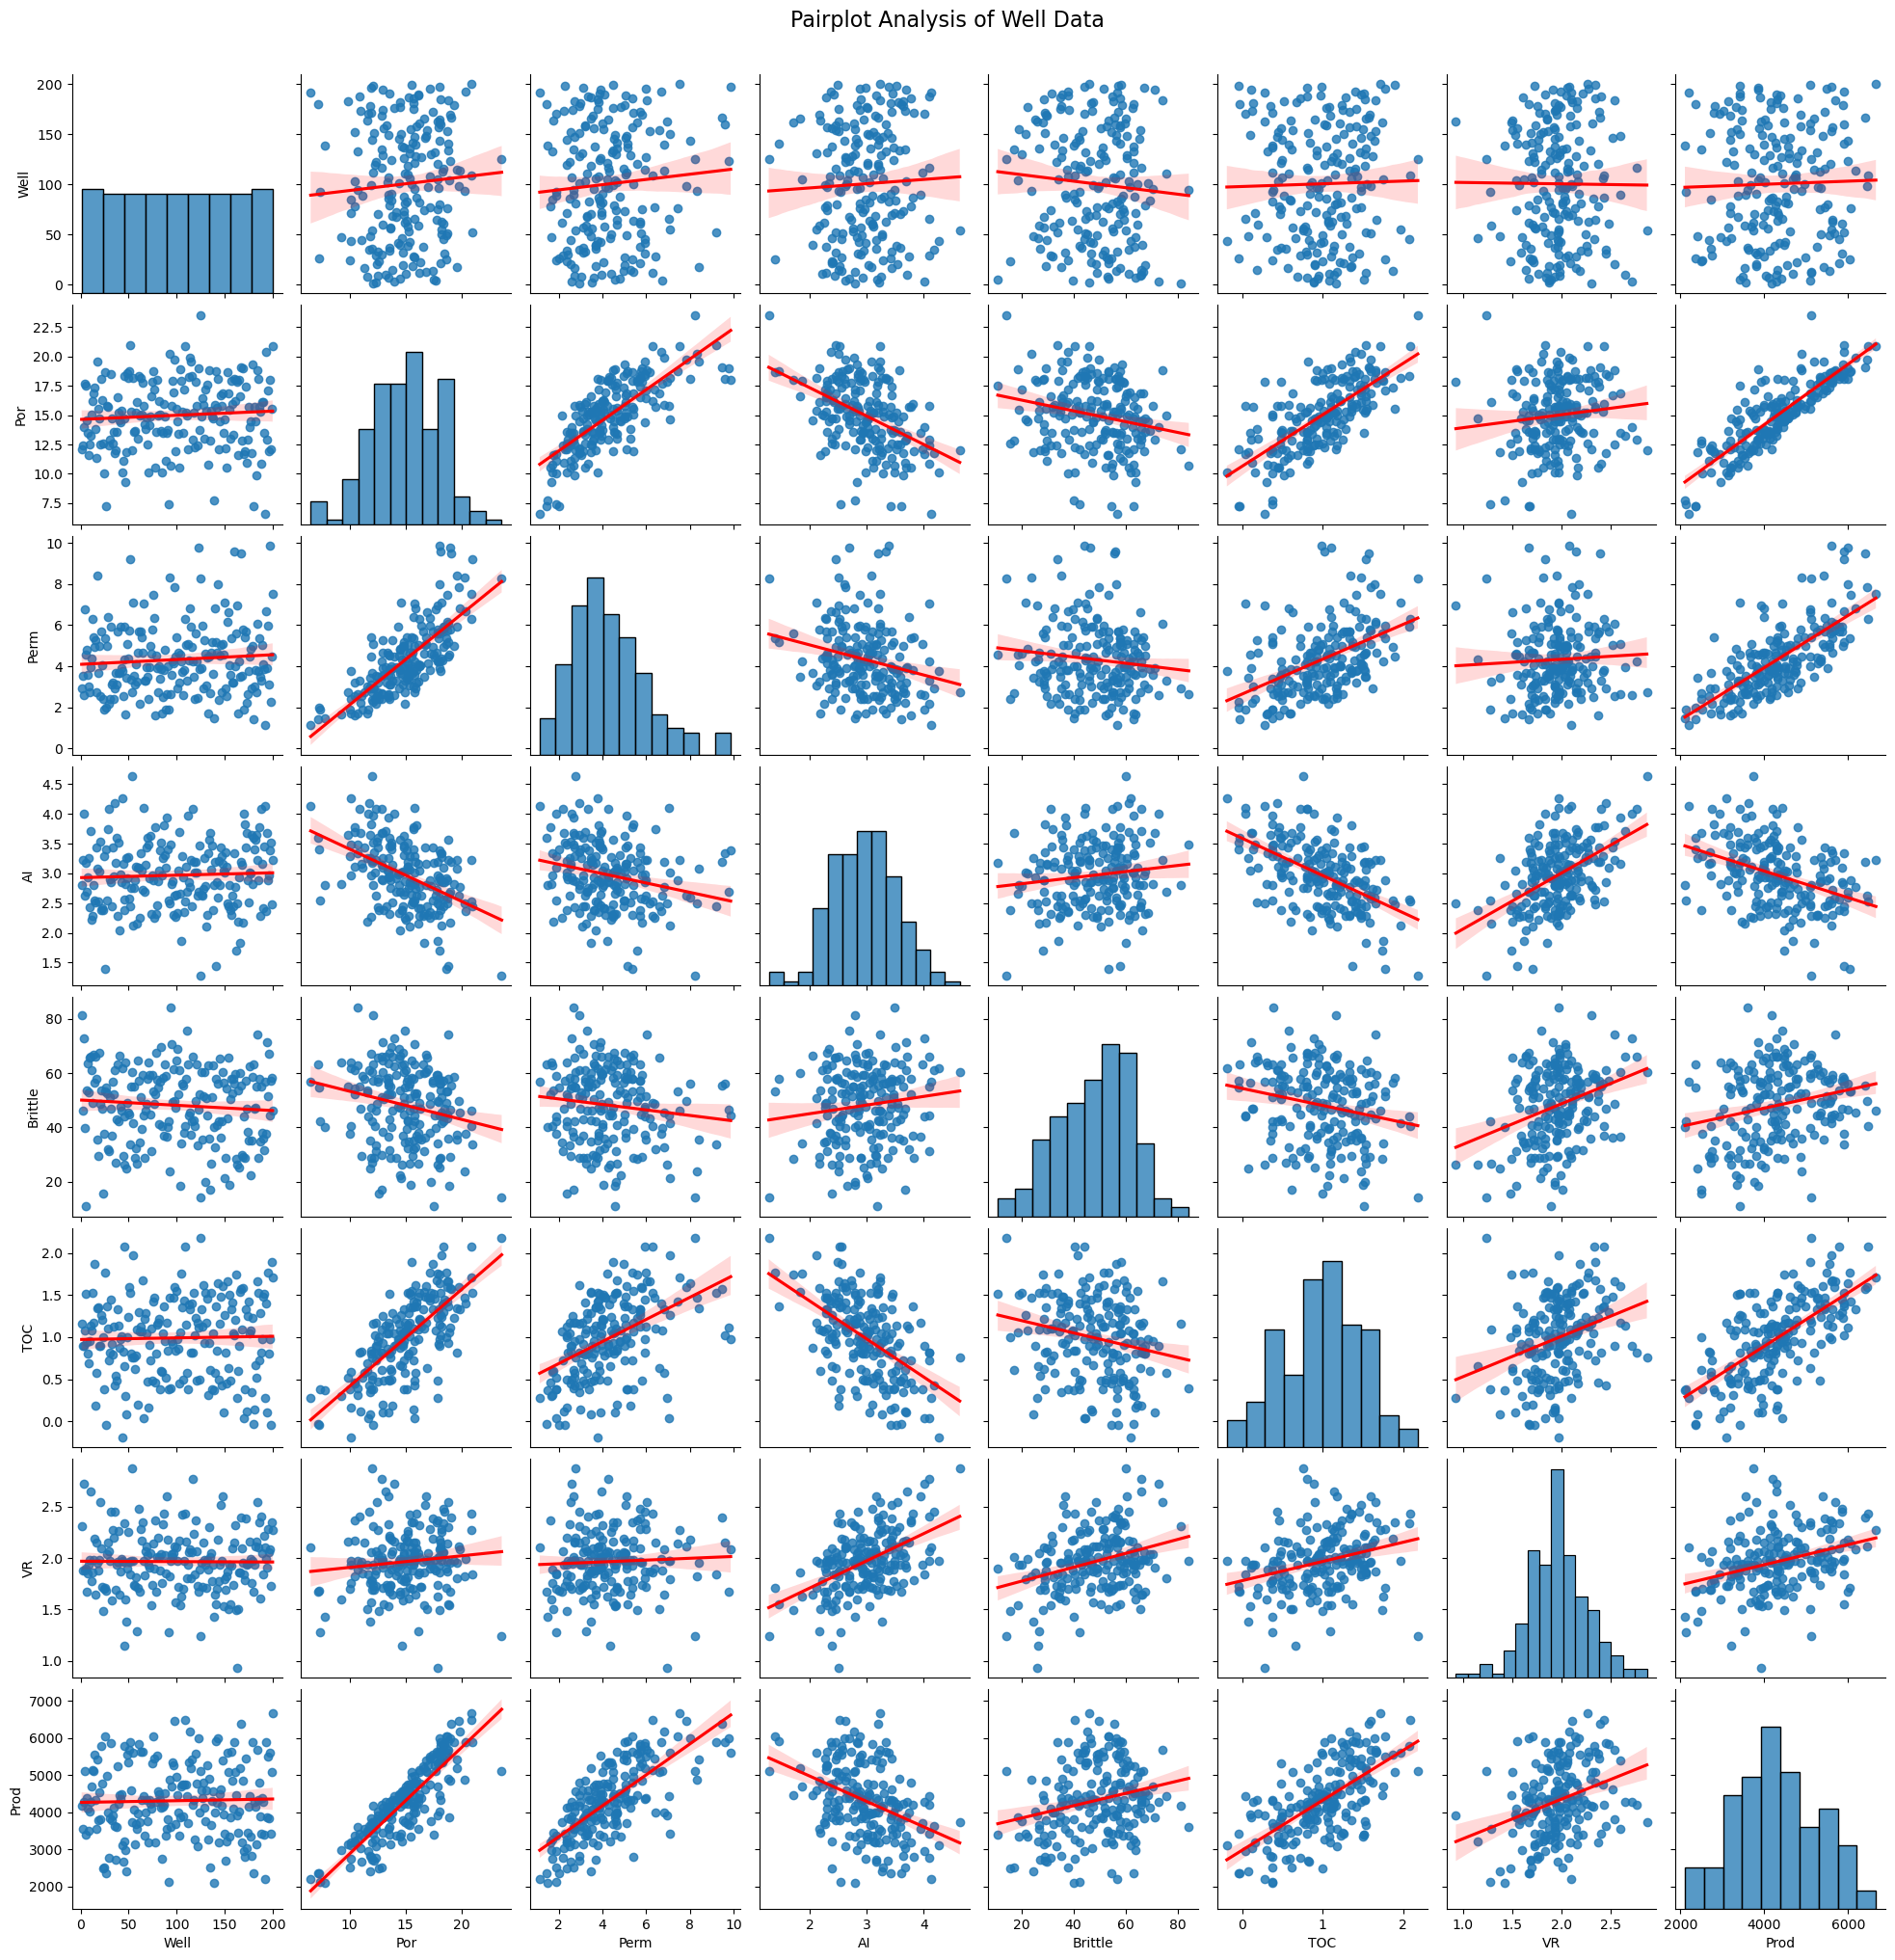

In [206]:
sns.pairplot(data, kind='reg', markers='o', plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle("Pairplot Analysis of Well Data", y=1.02, fontsize=16)
plt.show()

По данным графиком можно заметить, что на добычу газа в сутки влияет пористость и проницаемость скважины

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

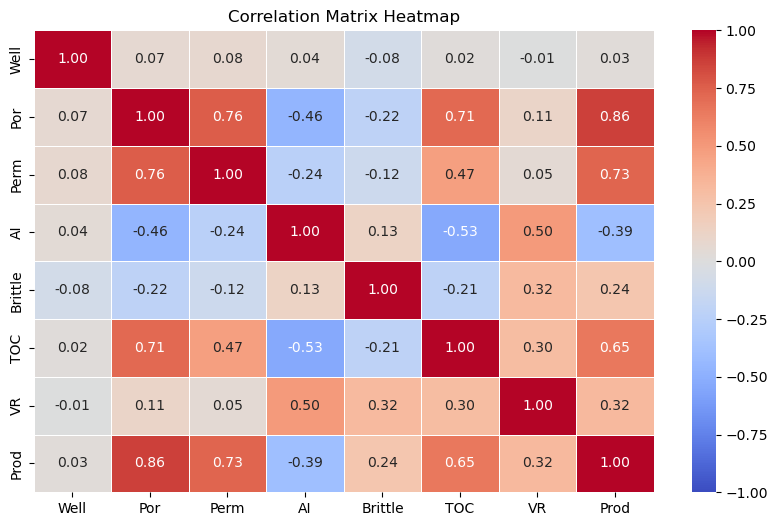

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652082


In [207]:
# Ваш код здесь
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("Ранг корреляционной матрицы:", np.linalg.matrix_rank(correlation_matrix))
print("Определитель корреляционной матрицы:", np.linalg.det(correlation_matrix))

In [208]:
data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


> *Ваши выводы здесь*

- сильнее всего с целевой переменной коррелируют признаки Por, Perm, Toc
- да, корр. матрица является плохо обусловленной, т.к. определитель близок к 0
- мультиколлинеарность присутствует, особенно между признаками Por, Perm и TOC, где корреляции достигают значений выше 0.7. Это может привести к нестабильности модели
- модель линейной регрессии применима, но из-за мультиколлинеарности её коэффициенты могут быть нестабильными

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [209]:
# Ваш код здесь

X = data.drop(columns=["Prod"]).values
y = data["Prod"].values

# Добавляем столбец единиц для учета свободного члена (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Вычисление коэффициентов линейной регрессии по формуле МНК
beta = np.linalg.inv(X.T @ X) @ X.T @ y

beta_rounded = np.round(beta)

list(beta_rounded)

[-1232.0, 0.0, 230.0, 116.0, -365.0, 25.0, -78.0, 785.0]

> *Ваши выводы здесь*
- неинформативным признаком является Well, потому что является иденцификатором. Может оказывать шумовое влияние
- Por: увеличение пористости на 1% связано с увеличением добычи газа на 230 млн. кубических футов в сутки
- Perm: увеличение проницаемости на 1 единицу связано с ростом добычи газа на 116 млн.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [210]:
# Ваш код здесь

new_well = {
    "Well": 106.0,
    "Por": 15.32,
    "Perm": 3.71,
    "AI": 3.29,
    "Brittle": 55.99,
    "TOC": 1.35,
    "VR": 2.42,
}

actual_production = 4748.315024

# Создание вектора факторов для прогноза (включая свободный член)
new_well_features = np.array([1] + list(new_well.values()))

# Построение прогноза
predicted_production = np.dot(new_well_features, beta)

absolute_error = abs(predicted_production - actual_production)

# Прогнозы для всех скважин
predictions = np.dot(X, beta)

print("Прогнозируемое значение: ", predicted_production)
print("Абсолютная ошибка: ", absolute_error)
print("Метрика MAE: ", np.sum(np.abs(predictions - y)) / len(y))
print("Метрика RMSE: ", np.sqrt(np.sum((predictions - y) ** 2) / len(y)))

Прогнозируемое значение:  4723.064053707194
Абсолютная ошибка:  25.250970292806414
Метрика MAE:  153.62297086558314
Метрика RMSE:  198.2802061232194


> *Ваши выводы здесь*
- абсолютная ошибка относительно высока
- метрика MAE и RMSE тоже относительно высоки, что указывает на необходимость улучшения модели

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [211]:
# Ваш код здесь

print("Коэффициенты корреляции:\n", correlation_matrix.loc["Prod"].to_frame())

print("\nКоэффициенты:\n", beta_rounded)

Коэффициенты корреляции:
              Prod
Well     0.026817
Por      0.861910
Perm     0.727426
AI      -0.390835
Brittle  0.237155
TOC      0.654445
VR       0.323182
Prod     1.000000

Коэффициенты:
 [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*

TOC: Здесь есть явное противоречие. Корреляция говорит о положительной связи, а модель — об отрицательной. Возможно, это связано с мультиколлинеарностью

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [212]:
# Ваш код здесь

X_NEW = data.drop(columns=["Prod", "Well", "Perm"]).values  # Убираем 'Well' и 'Perm'
y_new = data["Prod"].values

# Добавляем столбец единиц для учета свободного члена (intercept)
X_NEW = np.hstack([np.ones((X_NEW.shape[0], 1)), X_NEW])

# Вычисление коэффициентов линейной регрессии по формуле МНК
beta_new = np.linalg.inv(X_NEW.T @ X_NEW) @ X_NEW.T @ y_new

beta_rounded_new = np.round(beta_new)

print(list(beta_rounded_new))

[-1889.0, 290.0, -140.0, 29.0, 89.0, 407.0]


In [213]:
# Прогнозы для всех скважин
predictions_new = np.dot(X_NEW, beta_new)

print("Метрика MAE: ", np.sum(np.abs(predictions_new - y_new)) / len(y_new))
print("Метрика RMSE: ", np.sqrt(np.sum((predictions_new - y_new) ** 2) / len(y_new)))

Метрика MAE:  170.36541690392303
Метрика RMSE:  231.0707245330216


> *Ваши выводы здесь* 
- Por: увеличение пористости на 1% связано с увеличением добычи газа на 290 млн. кубических футов в сутки
- AI: увеличение на 1 единицу связано с понижением добычи газа на 140 млн.


- влияние фактора Por увеличилось, ранне значение - 230, текущее - 290
- влияение фактора AI снизилось, раннее значение - -365, текущее - 140


- полученные ранее значения метрик были ниже, чем сейчас. Точность модели снизилась
- противоречие между коэффициентами линейной регрессии и корреляциями было устранено

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [215]:
# Ваш код здесь

model = LinearRegression(fit_intercept=False)
model.fit(X_NEW, y_new)

beta_sklearn = np.round(model.coef_)

print("Коэффициенты модели (sklearn):", list(beta_sklearn))

# Прогнозы для всех скважин
predictions_sklearn = model.predict(X_NEW)

# Расчет метрик
mae_sklearn = mean_absolute_error(y_new, predictions_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y_new, predictions_sklearn))

print("Метрика MAE (sklearn):", mae_sklearn)
print("Метрика RMSE (sklearn):", rmse_sklearn)

Коэффициенты модели (sklearn): [-1889.0, 290.0, -140.0, 29.0, 89.0, 407.0]
Метрика MAE (sklearn): 170.36541690392485
Метрика RMSE (sklearn): 231.07072453302158


> *Ваши выводы здесь*
- коэффициенты и метрики одинаковые, что при ручных вычислениях, что при помощи библиотеки

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [216]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [217]:
# Ваш код здесь

X = data.drop(columns=["Prod", "Well", "Perm"]).values  
y = data["Prod"].values

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print("Количество факторов после генерации полиномиальных признаков:", X_poly.shape[1])

# Обучение модели линейной регрессии на полиномиальных признаках
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

# Оценка модели с использованием кросс-валидации
# Оценка на 5 фолдах с использованием MAE
mae_scores_pr = cross_validate(
    model, X_poly, y, cv=5, scoring="neg_mean_absolute_error", return_train_score=True
)

# Оценка на 5 фолдах с использованием RMSE
rmse_scores_pr = cross_validate(
    model,
    X_poly,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    return_train_score=True,
)

print("\nСреднее значение MAE на валидационных фолдах:", -mae_scores_pr["test_score"].mean())
print(
    "Среднее значение MAE на тренировочных фолдах:", -mae_scores_pr["train_score"].mean()
)

print(
    "\nСреднее значение RMSE на валидационных фолдах:", -rmse_scores_pr["test_score"].mean()
)
print(
    "Среднее значение RMSE на тренировочных фолдах:", -rmse_scores_pr["train_score"].mean()
)

Количество факторов после генерации полиномиальных признаков: 55

Среднее значение MAE на валидационных фолдах: 116.96912102406331
Среднее значение MAE на тренировочных фолдах: 61.91333935673579

Среднее значение RMSE на валидационных фолдах: 156.3390728661631
Среднее значение RMSE на тренировочных фолдах: 82.44597970281448


> *Ваши выводы здесь*
- модель стала более точно предсказывать выработку газа после включения полиномиальных признаков, так как ошибки предсказаний стали меньше
-  разница между значениями на тренировочных и валидационных фолдах может свидетельствовать о некотором переобучении, хотя оно не является критичным в виду малого количества наблюдений в данных

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [218]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Ваш код здесь

lasso = Lasso(max_iter=10000, tol=1e-4)

param_grid = {"alpha": np.logspace(0, 5, 100)}

grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error"
)
grid_search.fit(X_poly, y)

print("Лучший alpha для Lasso:", grid_search.best_params_["alpha"])

best_param_lasso = grid_search.best_params_["alpha"]

best_lasso = grid_search.best_estimator_

mae_scores_lasso = cross_validate(
    best_lasso,
    X_poly,
    y,
    cv=5,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
)
rmse_scores_lasso = cross_validate(
    best_lasso,
    X_poly,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    return_train_score=True,
)

print(
    "\nСреднее значение MAE на валидационных фолдах:",
    -mae_scores_lasso["test_score"].mean(),
)
print(
    "Среднее значение MAE на тренировочных фолдах:",
    -mae_scores_lasso["train_score"].mean(),
)

print(
    "\nСреднее значение RMSE на валидационных фолдах:",
    -rmse_scores_lasso["test_score"].mean(),
)
print(
    "Среднее значение RMSE на тренировочных фолдах:",
    -rmse_scores_lasso["train_score"].mean(),
)

Лучший alpha для Lasso: 4.0370172585965545

Среднее значение MAE на валидационных фолдах: 88.96001174989507
Среднее значение MAE на тренировочных фолдах: 71.36030710420482

Среднее значение RMSE на валидационных фолдах: 120.46374110031131
Среднее значение RMSE на тренировочных фолдах: 96.74378099472378


> *Ваши выводы здесь*
- значения MAE и RMSE на валидационных фолдах снизились, что указывает на лучшее общее качество прогноза, несмотря на небольшое увеличение ошибки на тренировочных данных. Это говорит о том, что регуляризация помогла модели избежать переобучения
- Lasso (с L1-регуляризацией) показывает лучший результат на валидационных фолдах по метрикам MAE и RMSE, что может свидетельствовать о лучшей способности модели справляться с избыточными признаками, благодаря способности отбрасывать малозначимые переменные

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [220]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(max_iter=10000)

param_grid = {"alpha": np.logspace(0, 5, 100)}

grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error"
)
grid_search.fit(X_poly, y)

print("Лучший alpha для Ridge:", grid_search.best_params_["alpha"])
best_param_ridge = grid_search.best_params_["alpha"]

best_ridge = grid_search.best_estimator_

mae_scores_ridge = cross_validate(
    best_ridge,
    X_poly,
    y,
    cv=5,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
)

rmse_scores_ridge = cross_validate(
    best_ridge,
    X_poly,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    return_train_score=True,
)

print(
    "\nСреднее значение MAE на валидационных фолдах:", -mae_scores_ridge["test_score"].mean()
)
print(
    "Среднее значение MAE на тренировочных фолдах:", -mae_scores_ridge["train_score"].mean()
)

print(
    "\nСреднее значение RMSE на валидационных фолдах:",
    -rmse_scores_ridge["test_score"].mean(),
)
print(
    "Среднее значение RMSE на тренировочных фолдах:", -rmse_scores_ridge["train_score"].mean()
)


Лучший alpha для Ridge: 1.0

Среднее значение MAE на валидационных фолдах: 105.37189911138958
Среднее значение MAE на тренировочных фолдах: 65.19288948133365

Среднее значение RMSE на валидационных фолдах: 138.56853366502725
Среднее значение RMSE на тренировочных фолдах: 87.41682291606261


> *Ваши выводы здесь*

- Ridge (с L2-регуляризацией) демонстрирует меньшую ошибку на тренировочных данных по сравнению с Lasso, что может указывать на большую способность модели к обобщению, однако, из-за сильной регуляризации она хуже справляется с валидационными данными
- Lasso показывает лучше результат на валидационных фолдах

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [222]:
from sklearn.linear_model import ElasticNet

In [223]:
# Ваш код здесь

elastic_net = ElasticNet(max_iter=10000)

param_grid = {
    "alpha": np.linspace(0.1, 30, 32),
    "l1_ratio": np.linspace(0.1, 0.9, 9),
}

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
)

grid_search.fit(X_poly, y)

print("Лучшие параметры для ElasticNet:", grid_search.best_params_)

best_param_en = grid_search.best_params_.values()
best_elastic_net = grid_search.best_estimator_

mae_scores_en = cross_validate(
    best_elastic_net,
    X_poly,
    y,
    cv=5,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
)

rmse_scores_en = cross_validate(
    best_elastic_net,
    X_poly,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    return_train_score=True,
)

# Средние значения MAE
print(
    "\nСреднее значение MAE на валидационных фолдах:", -mae_scores_en["test_score"].mean()
)
print(
    "Среднее значение MAE на тренировочных фолдах:", -mae_scores_en["train_score"].mean()
)

# Средние значения RMSE
print(
    "\nСреднее значение RMSE на валидационных фолдах:",
    -rmse_scores_en["test_score"].mean(),
)
print(
    "Среднее значение RMSE на тренировочных фолдах:", -rmse_scores_en["train_score"].mean()
)

Лучшие параметры для ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}

Среднее значение MAE на валидационных фолдах: 105.9880608440241
Среднее значение MAE на тренировочных фолдах: 68.26068462582774

Среднее значение RMSE на валидационных фолдах: 138.75886524175908
Среднее значение RMSE на тренировочных фолдах: 91.33729402276128


> *Ваши выводы здесь*
- alpha = 0.1 и l1_ratio = 0.9 — указывают на то, что для наших данных наиболее эффективно сочетание сильной L1-регуляризации (когда l1_ratio близко к 1) и умеренной регуляризации (малое значение alpha).
- существует некоторое отличие между тренировочными и валидационными фолдами. Это может свидетельствовать о наличии переобучения
- в целом данная модель справилась хуже

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [224]:
# Ваш код здесь

lr = LinearRegression(fit_intercept=False)

lr_mae = cross_validate(
    lr, X_NEW, y_new, scoring="neg_mean_absolute_error", cv=5, return_train_score=True
)
lr_rmse = cross_validate(
    lr,
    X_NEW,
    y_new,
    scoring="neg_root_mean_squared_error",
    cv=5,
    return_train_score=True,
)

print("MAE на валидационных фолдах:", -lr_mae["test_score"].mean())
print("MAE на тренировочных фолдах:", -lr_mae["train_score"].mean())

print("MSE на валидационных фолдах:", -lr_rmse["test_score"].mean())
print("MSE на тренировочных фолдах:", -lr_rmse["train_score"].mean())

MAE на валидационных фолдах: 179.87106460406997
MAE на тренировочных фолдах: 169.6318781450204
MSE на валидационных фолдах: 241.36475325255984
MSE на тренировочных фолдах: 229.5834033373779


In [225]:
dict = {
    "Модель": ["Lineal", "Polynomial", "Lasso", "Ridge", "ElasticNet"],
    "Гиперпараметры": [
        np.nan,
        np.nan,
        best_param_lasso,
        best_param_ridge,
        best_param_en,
    ],
    "Полиномиальные признаки": [False, True, True, True, True],
    "MAE train": [
        -lr_mae["train_score"].mean(),
        -mae_scores_pr["train_score"].mean(),
        -mae_scores_lasso["train_score"].mean(),
        -mae_scores_ridge["train_score"].mean(),
        -mae_scores_en["train_score"].mean(),
    ],
    "MAE test": [
        -lr_mae["test_score"].mean(),
        -mae_scores_pr["test_score"].mean(),
        -mae_scores_lasso["test_score"].mean(),
        -mae_scores_ridge["test_score"].mean(),
        -mae_scores_en["test_score"].mean(),
    ],
    "RMSE train": [
        -lr_rmse["train_score"].mean(),
        -rmse_scores_pr["train_score"].mean(),
        -rmse_scores_lasso["train_score"].mean(),
        -rmse_scores_ridge["train_score"].mean(),
        -rmse_scores_en["train_score"].mean(),
    ],
    "RMSE test": [
        -lr_rmse["test_score"].mean(),
        -rmse_scores_pr["test_score"].mean(),
        -rmse_scores_lasso["test_score"].mean(),
        -rmse_scores_ridge["test_score"].mean(),
        -rmse_scores_en["test_score"].mean(),
    ],
}

# создаем датафрейм
df = pd.DataFrame(dict)

df

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,RMSE train,RMSE test
0,Lineal,NaN,False,169.631878,179.871065,229.583403,241.364753
1,Polynomial,NaN,True,61.913339,116.969121,82.445980,156.339073
2,Lasso,4.037017,True,71.360307,88.960012,96.743781,120.463741
3,Ridge,1.0,True,65.192889,105.371899,87.416823,138.568534
4,ElasticNet,"(0.1, 0.9)",True,68.260685,105.988061,91.337294,138.758865


> *Ваши выводы здесь*

1. Использование полиномиальных признаков улучшает результаты. Модель с показывает значительно лучшие значения MAE и RMSE на тестовых данных по сравнению с линейной моделью

2. Lasso с регуляризацией демонстрирует наилучшие результаты. Она имеет наименьшие значения MAE и RMSE на тестовых данных